In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
%%time

from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

date_list = pd.date_range('2020-07-01', periods=100, freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=' + (today.strftime('%Y%m%d'))
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), 'html.parser')
    
    titles = soup.find_all('div', {'class': 'tit5'})
    points = soup.find_all('td', {'class': 'point'})
    
    titles_text = []
    points_text = []
    date = []
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)
        
    movie_title += titles_text
    movie_point += points_text
    movie_date += date
    
# print(movie_title[:5])
# print(movie_point[:5])
# print(movie_date)


  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 10.1 s, sys: 290 ms, total: 10.4 s
Wall time: 39.3 s


In [3]:
frame = pd.DataFrame({'date': movie_date, 'title': movie_title, 'point': movie_point})
frame

,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
4995,2020-10-08,쉰들러 리스트,9.36
4996,2020-10-08,클레멘타인,9.36
4997,2020-10-08,안녕 베일리,9.36
4998,2020-10-08,서유기 2 - 선리기연,9.36


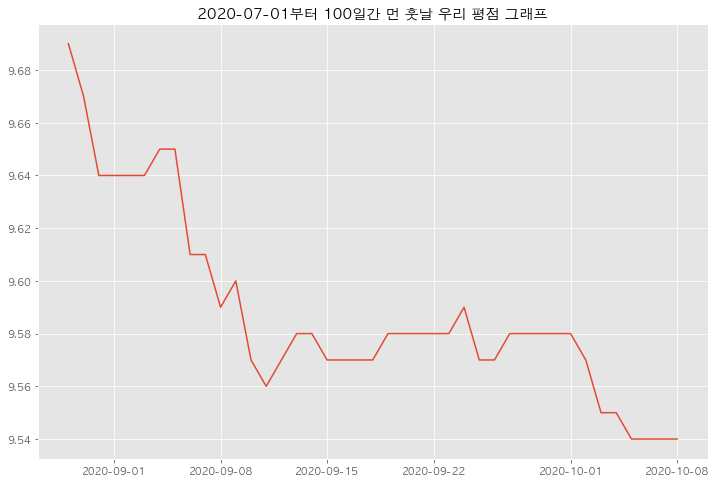

In [4]:
import matplotlib.pyplot as plt

input_title = '먼 훗날 우리'
search_movie = frame.query("title == ['{}']".format(input_title))

# print(search_movie)

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# figsize=(width, height). it uses inch.
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.show()

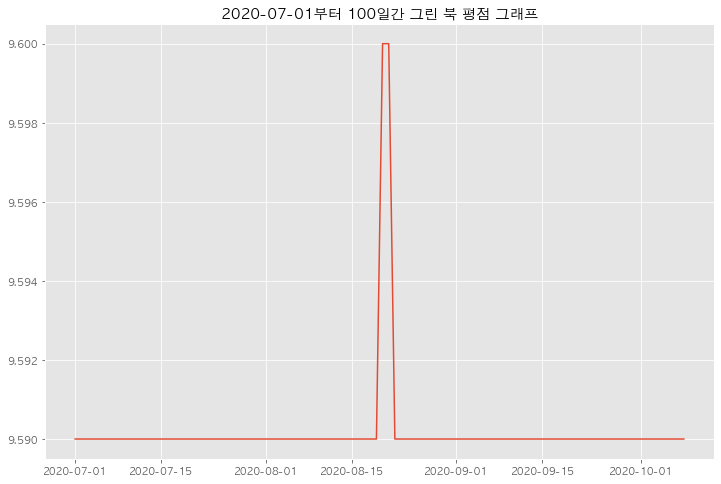

In [5]:
import matplotlib.pyplot as plt

input_title = '그린 북'
search_movie = frame.query("title == ['{}']".format(input_title))

# print(search_movie)

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# figsize=(width, height). it uses inch.
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.show()

# 실습: 지난 시간에 제출한 주피터 노트북에 그래프를 그려 제출하기

## 그래프 결과 해석

### 영화와 기간
영화 '먼 훗날 우리'와 '그린 북'의 평점에 대한 그래프를 그렸습니다. 
날짜는 2020-07-01 부터 100일간의 기간입니다.

### 그래프 해석
그래프의 계형을 보면 '먼 훗날 우리'의 그래프는 변동이 심한 반면에 '그린 북'의 그래프는 변동이 적습니다. 

이를 제대로 해석하기 위해서 **리뷰의 개수**를 알아보았습니다.

- 먼 훗날 우리
    - 1347개
- 그린 북
    - 7694개
    
해당 영화에 달린 리뷰의 개수를 보면 변동에 대한 이유를 알 수 있습니다.

'먼 훗날 우리'는 표본이 작아 리뷰 하나가 평균에 미치는 영향이 큰 반면에 '그린 북'은 표본이 커 리뷰 하나가 평균에 미치는 영향이 작습니다.

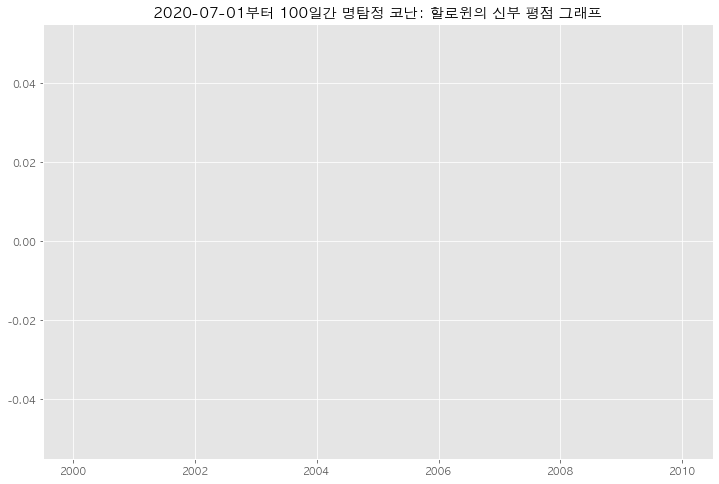

In [6]:
import matplotlib.pyplot as plt

input_title = ''
search_movie = frame.query("title == ['{}']".format(input_title))

# print(search_movie)

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# figsize=(width, height). it uses inch.
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.show()